In [ ]:
import h5py
from BdG import spherical , gp
import h5py
import numpy as np
import matplotlib.pylab as plt
import os
from importlib import reload

In [35]:
workdir="/home/luca/source/GP5/build"

In [36]:
r=spherical.generate_grid(0,30,shape=1000)
psi0=np.exp(-r**2)

<IPython.core.display.Javascript object>


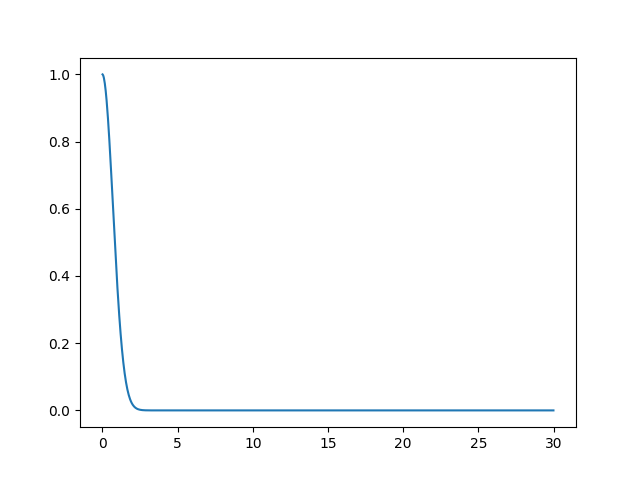

In [37]:
%matplotlib notebook
plt.plot(r,psi0)

In [38]:
spherical.save(psi0,os.path.join(workdir,"psi0.h5"))

In [39]:
psi=spherical.load(os.path.join(workdir,"gs.h5"))

<IPython.core.display.Javascript object>


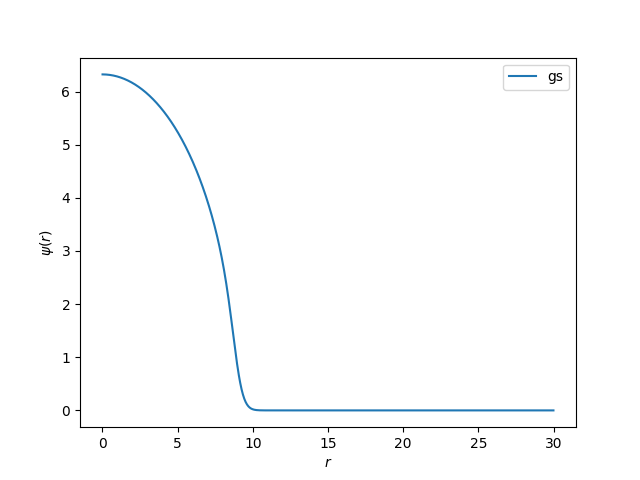

In [40]:
%matplotlib notebook
plt.plot(r,psi,label="gs")
plt.xlabel(r"$r$")
plt.ylabel(r"$\psi(r)$")
plt.legend()
plt.show()

In [41]:
N=spherical.norm(psi,r)

In [42]:
model=gp.trappedGP(g=1,mu=40)

In [43]:
reload(gp)
B=model.buildBdGMatrix(r,psi)
e,v=spherical.solveBdG(B)

<IPython.core.display.Javascript object>


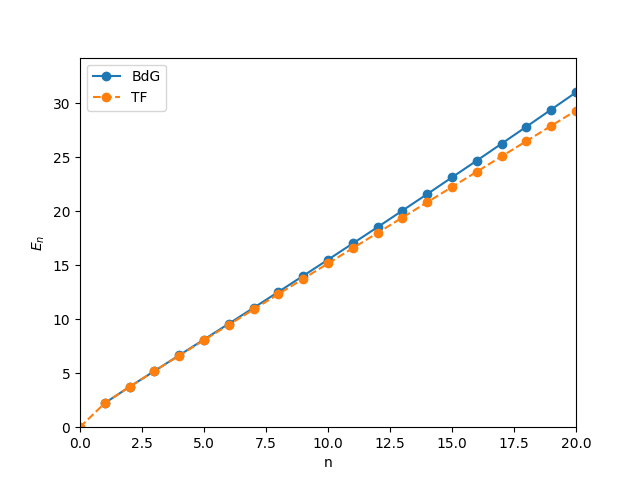

/home/luca/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/luca/.local/lib/python3.8/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


In [52]:
%matplotlib notebook
n=np.arange(0, len(e) )
modeTF = lambda n: (2*n**2 + 3*n )**(1/2)
modeHo = lambda n:  2*n

plt.plot( n+1 , e ,"o-",label="BdG")
plt.plot(n,modeTF(n),"o--",label="TF")

plt.xlabel("n")
plt.ylabel("$E_n$")
plt.xlim(0,20)
plt.ylim(0,e[20+1])
plt.legend()

<IPython.core.display.Javascript object>


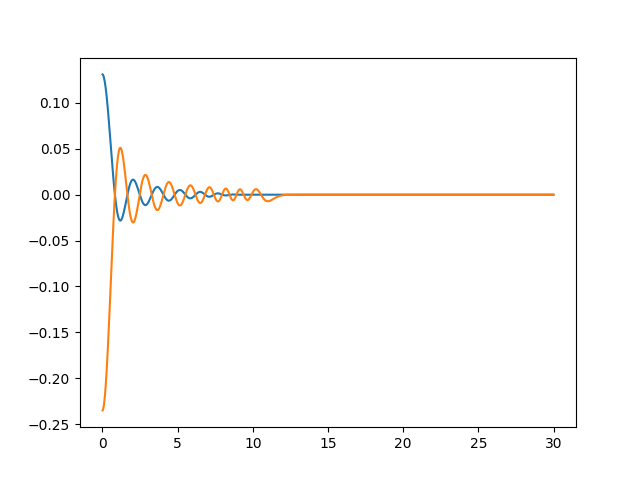

In [45]:
%matplotlib notebook
n=15
plt.plot(r,np.real(v[len(r):,n]),"-",label="v" )
plt.plot(r,np.real(v[0:len(r),n]),"-",label="u" )

## $S(q,\omega)$ in the Local Density Approximation

In [46]:
from BdG import dynamicStructureFactor
reload(dynamicStructureFactor)

<module 'BdG.dynamicStructureFactor' from '/home/luca/source/GP5/run/BdG/BdG/dynamicStructureFactor.py'>

In [47]:
g=1
mu=40
S=dynamicStructureFactor.dynamicStructureFactorLDA(
    density=np.abs(psi)**2,
    r=r,bins=1000,
    epsi=lambda q,n: np.sqrt(q**2/2*(q**2/2 + 2*g*n)) )

In [48]:
q=np.arange(1,100+1)*np.pi/(np.max(r) )
omega=np.linspace(0,40,num=1000)
_S=S(q,omega)

<IPython.core.display.Javascript object>


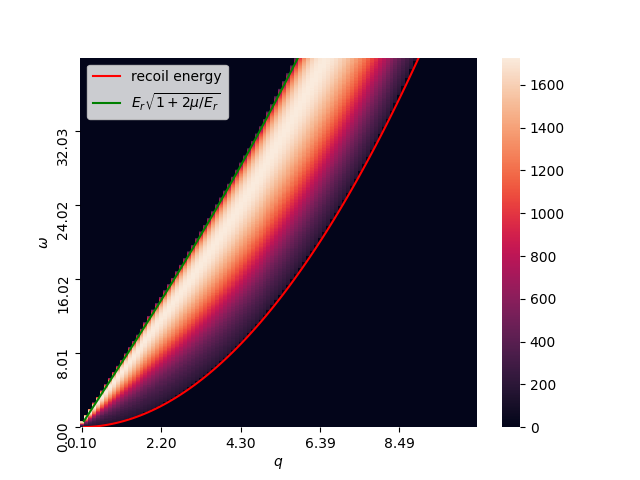

In [49]:
%matplotlib notebook
dynamicStructureFactor.plot(_S,q,omega,mu=mu )

In [ ]:
## $S(q,\omega) from eigen states$

In [50]:
q=np.arange(1,1000+1)*np.pi/(np.max(r)*10)
S=dynamicStructureFactor.dynamicStructureFactor(e=e,vs=v,r=r,psi0=psi)
_S=S(q)

100%|█████████████████████████████████████████| 999/999 [01:10<00:00, 14.18it/s]


<IPython.core.display.Javascript object>


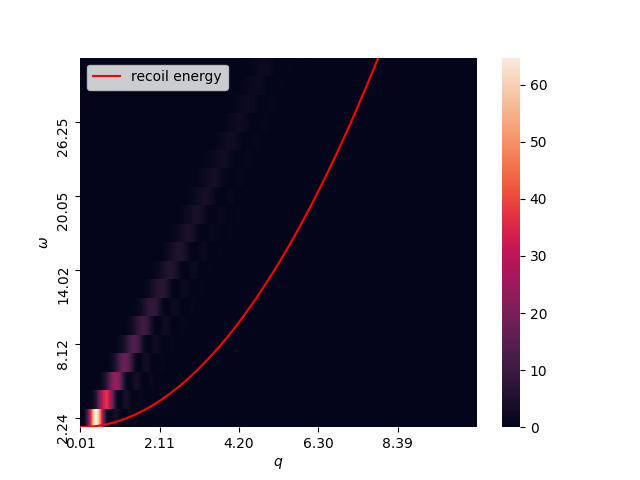

In [51]:
%matplotlib notebook
dynamicStructureFactor.plot(_S[:,0:20],q,np.real(e[0:20]) )